<a href="https://colab.research.google.com/github/Lakshmihasa/Lakshmihasa/blob/main/NLP/Assignements/Sentimental%20Analysis_and_Text%20Processing/sentiment_analyst%2CTp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas spacy textblob matplotlib seaborn

In [2]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import pandas as pd

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Emotion_classify_Data.csv to Emotion_classify_Data.csv


In [11]:
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

In [12]:
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [13]:
!pip install pandas spacy textblob matplotlib seaborn

In [14]:

!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [20]:

df.columns


Index(['Comment', 'Emotion'], dtype='object')

In [21]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string

In [22]:
nlp = spacy.load('en_core_web_sm')

In [25]:
def preprocess_text(Emotion):
    doc = nlp(Emotion.lower())
    tokens = [token.lemma_ for token in doc if token.text not in STOP_WORDS and token.text not in string.punctuation]
    return ' '.join(tokens)

In [28]:
df['cleaned_text'] = df['Emotion'].apply(preprocess_text)

In [29]:
df.head()

,Comment,Emotion,cleaned_text
0,i seriously hate one subject to death but now ...,fear,fear
1,im so full of life i feel appalled,anger,anger
2,i sit here to write i start to dig out my feel...,fear,fear
3,ive been really angry with r and i feel like a...,joy,joy
4,i feel suspicious if there is no one outside l...,fear,fear


In [31]:
from textblob import TextBlob

In [32]:
def get_sentiment(Emotion):
    return TextBlob(Emotion).sentiment.polarity

In [33]:
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

In [34]:
df.head()

,Comment,Emotion,cleaned_text,sentiment
0,i seriously hate one subject to death but now ...,fear,fear,0.0
1,im so full of life i feel appalled,anger,anger,-0.7
2,i sit here to write i start to dig out my feel...,fear,fear,0.0
3,ive been really angry with r and i feel like a...,joy,joy,0.8
4,i feel suspicious if there is no one outside l...,fear,fear,0.0


In [38]:
def analyze_text(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    pos_tags = [(token.text, token.pos_) for token in doc]
    return entities, pos_tags

In [50]:
df['Emotion'], df['pos_tags'] = zip(*df['cleaned_text'].apply(analyze_text))



In [51]:
df.head()

,Comment,Emotion,cleaned_text,sentiment,entities,pos_tags
0,i seriously hate one subject to death but now ...,[],fear,0.0,[],"[(fear, VERB)]"
1,im so full of life i feel appalled,[],anger,-0.7,[],"[(anger, NOUN)]"
2,i sit here to write i start to dig out my feel...,[],fear,0.0,[],"[(fear, VERB)]"
3,ive been really angry with r and i feel like a...,[],joy,0.8,[],"[(joy, NOUN)]"
4,i feel suspicious if there is no one outside l...,[],fear,0.0,[],"[(fear, VERB)]"


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

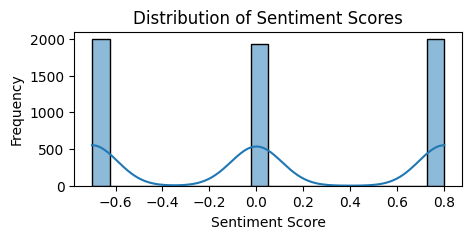

In [45]:
plt.figure(figsize=(5, 2))
sns.histplot(df['sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [53]:
all_entities = [entity for entities in df['Emotion'] for entity in entities]

In [55]:
entity_freq = pd.Series([entity[0] for entity in all_entities]).value_counts().head(15)

In [63]:
print(df['Emotion'].dtype)
print(df['Comment'].dtype)


object
object


In [64]:

df['Emotion'] = df['Emotion'].apply(lambda x: str(x) if isinstance(x, list) else x)


In [65]:
df['Emotion'] = df['Emotion'].astype('category')


In [67]:

entity_Emotion = df['Emotion'].value_counts()


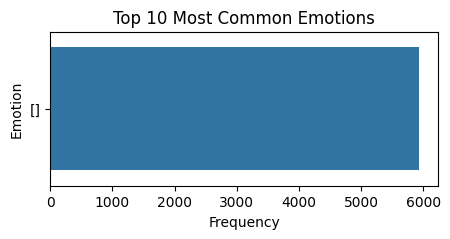

In [69]:
plt.figure(figsize=(5, 2))
sns.barplot(x=entity_Emotion.values, y=entity_Emotion.index)
plt.title('Top 10 Most Common Emotions')
plt.xlabel('Frequency')
plt.ylabel('Emotion')
plt.show()